In [12]:
using Plots
using LinearAlgebra
using DelimitedFiles
using DataFrames
using CSV

In [13]:
raw_traj = DataFrame(CSV.File("nand-logs/nand-lgap-gps.csv"))

Row,Timestamp,pos_x,pos_y,Horizontal Accuracy (mm)
,Int64,Float64,Float64,Float64
1,122561,4.47732e6,5.89753e5,14.1
2,122661,4.47732e6,5.89753e5,14.1
3,122762,4.47732e6,5.89753e5,14.1
4,122863,4.47732e6,5.89753e5,14.1
5,122964,4.47732e6,5.89753e5,14.1
6,123066,4.47732e6,5.89753e5,14.1
7,123166,4.47732e6,5.89753e5,14.1
8,123268,4.47732e6,5.89753e5,14.1
9,123369,4.47732e6,5.89753e5,14.1


# Trial 1
```
state_cov_matrix_t curr_state_cov{{1, 0, 0},
                                  {0, 1, 0},
                                  {0, 0, 1}};
state_cov_matrix_t process_noise{{0.0001, 0, 0},
                                  {0, 0.0001, 0},
                                  {0, 0, 0.000001}};
```

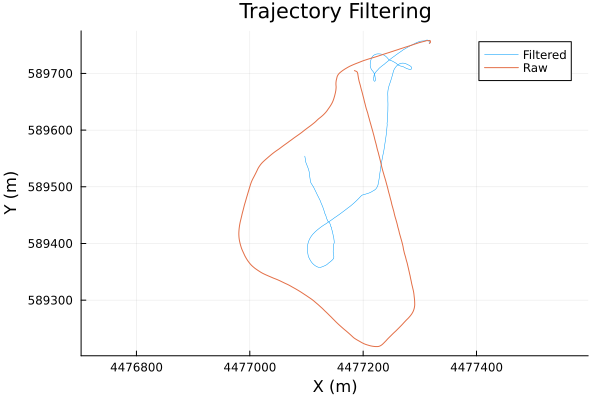

In [14]:
filter_traj_trial1 = DataFrame(CSV.File("trials/filter-trial1.csv"))

plot(title="Trajectory Filtering", xlabel="X (m)", ylabel="Y (m)", aspect_ratio=:equal)
plot!(filter_traj_trial1[3:end, "pos_x"], filter_traj_trial1[3:end, "pos_y"], label="Filtered", linewidth=0.5)
plot!(raw_traj[:, "pos_x"], raw_traj[:, "pos_y"], label="Raw")

In [16]:
cov_trial1 = DataFrame(CSV.File("trials/covariance-trial1.csv"))
timestamps = cov_trial1[:, "timestamp"]

plot(title="Estimate Standard Deviations", xlabel="Time(s)", ylabel="σᵢᵢ", yscale=:log10, ylim=(1e-3, 1))
plot!(timestamps, sqrt.(cov_trial1[:, "c1"]), label="X Position (m)")
plot!(timestamps, sqrt.(cov_trial1[:, "c4"]), label="Y Position (m)")
plot!(timestamps, sqrt.(cov_trial1[:, "c9"]), label="Heading (rad)")

DomainError: DomainError with -1.0e-6:
sqrt was called with a negative real argument but will only return a complex result if called with a complex argument. Try sqrt(Complex(x)).